In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import array_to_img, img_to_array, load_img, Sequence

#### Data Visualization

##### Splitting into test train split

In [2]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("C:\\Users\\meenaxi\\Downloads\\CNN_assignment\\Cancer\\Train")
data_dir_test = pathlib.Path("C:\\Users\\meenaxi\\Downloads\\CNN_assignment\\Cancer\\Test")

In [3]:
def plot_class_distribution(dir,classes,total_images,title):
    dist=[round((len(list(dir.glob(i+'/*.jpg'))) * 100 / total_images),2) for i in classes]
    df=pd.DataFrame({'class_name':classes,'distribution':dist})
    plt.bar(df['class_name'],df['distribution'])
    plt.xticks(rotation=90)
    plt.title(title)
    

In [4]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


In [5]:
batch_size = 32
img_height = 180
img_width = 180

In [6]:
train_ds=image_dataset_from_directory(data_dir_train,validation_split=0.2,subset='training',seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [7]:
class_names=train_ds.class_names

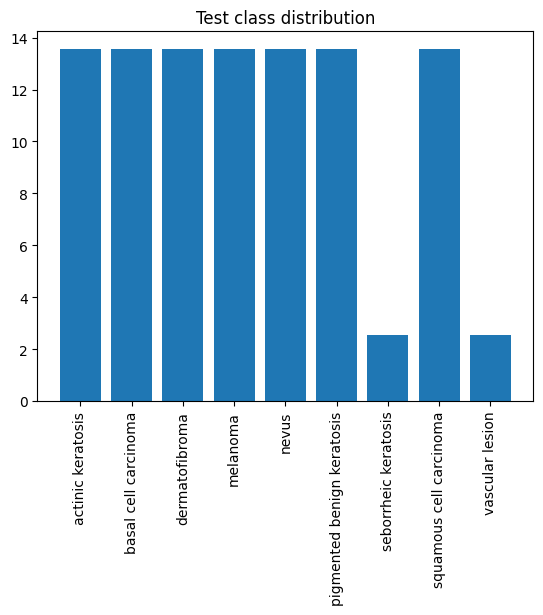

In [9]:
plot_class_distribution(data_dir_test,class_names,image_count_test,title='Test class distribution')

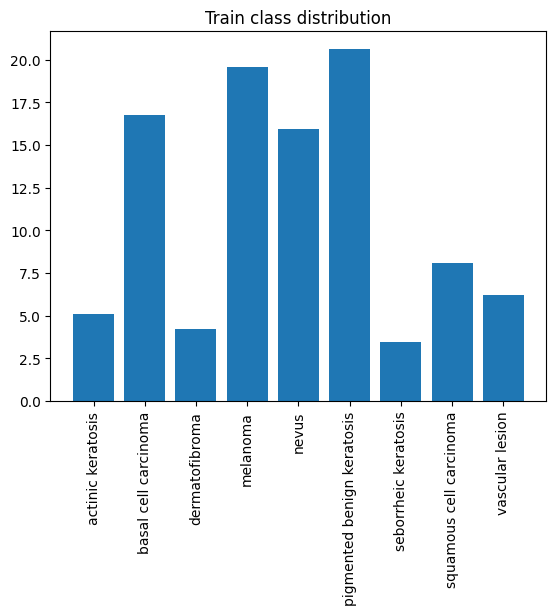

In [10]:
plot_class_distribution(data_dir_train,class_names,image_count_train,title='Train class distribution')

In [11]:
val_ds=image_dataset_from_directory(data_dir_train,validation_split=0.2,subset='validation',seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [12]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [13]:
len(class_names)

9

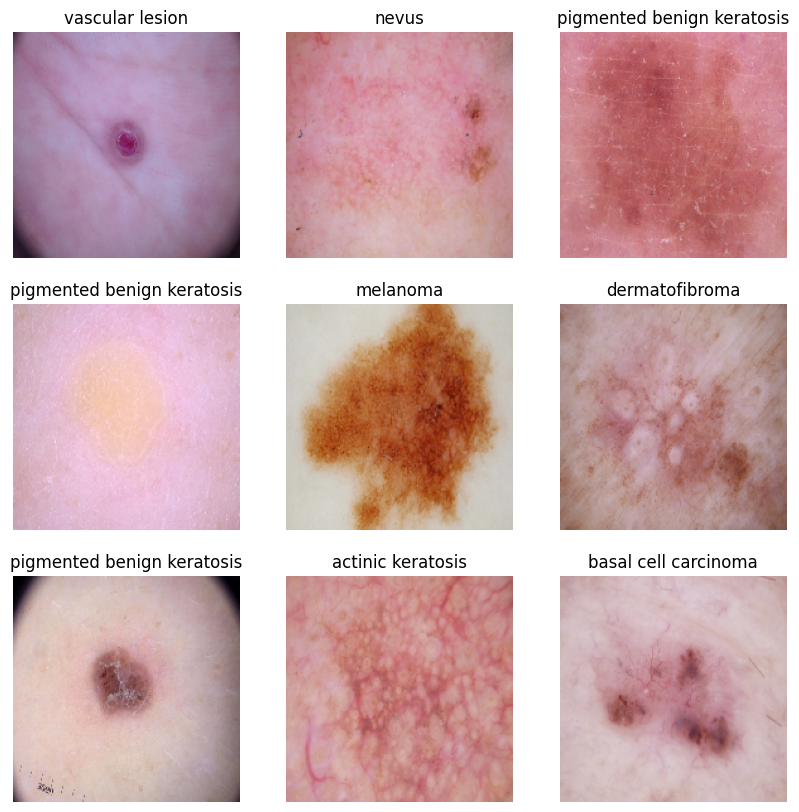

In [14]:
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [16]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [17]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

#### Model 1 - Basic Model Creation 

In [18]:
model=keras.Sequential()
model.add(keras.layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)))
model.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.MaxPooling2D(2,2))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(9,activation='softmax'))

C:\Python39\lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ rescaling (Rescaling)                │ (None, 180, 180, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d (Conv2D)                      │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       8,294,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,315,081 (31.72 MB)

 Trainable params: 8,314,761 (31.72 MB)

 Non-trainable params: 320 (1.25 KB)

In [20]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [21]:
history=model.fit(train_ds,validation_data=val_ds,verbose=1,epochs=20)

Epoch 1/20


C:\Python39\lib\site-packages\keras\src\backend\tensorflow\nn.py:678: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


56/56 ━━━━━━━━━━━━━━━━━━━━ 283s 4s/step - accuracy: 0.3904 - loss: 2.0145 - val_accuracy: 0.0872 - val_loss: 2.3794
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 150s 3s/step - accuracy: 0.5459 - loss: 1.3241 - val_accuracy: 0.0872 - val_loss: 3.3543
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 154s 3s/step - accuracy: 0.6148 - loss: 1.1368 - val_accuracy: 0.1566 - val_loss: 2.5397
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.6932 - loss: 0.9702 - val_accuracy: 0.1544 - val_loss: 2.6231
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 153s 3s/step - accuracy: 0.7097 - loss: 0.8437 - val_accuracy: 0.2819 - val_loss: 2.3342
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.7875 - loss: 0.6773 - val_accuracy: 0.2953 - val_loss: 2.6310
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 149s 3s/step - accuracy: 0.8468 - loss: 0.4963 - val_accuracy: 0.2662 - val_loss: 2.1992
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 145s 3s/step - accuracy: 0.8883 - loss: 0.4047 - val_accuracy: 0.2707 - val_loss: 2.

#### Model 1 Evaluation and Summary

In [28]:
model_traces=pd.DataFrame(history.history)

In [29]:
test_ds=image_dataset_from_directory(data_dir_test,seed=123,image_size=(img_height, img_width),batch_size=batch_size)

Found 118 files belonging to 9 classes.


In [30]:
np.max(model_traces['accuracy'])

np.float64(0.99609375)

In [31]:
predictions=model.predict(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 724ms/step


In [32]:
predicted_classes=[class_names[np.argmax(i)] for i in predictions]

In [33]:
model.evaluate(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 693ms/step - accuracy: 0.0378 - loss: 32.0881


[31.07359504699707, 0.04237288236618042]

In [35]:
model.evaluate(val_ds)

14/14 ━━━━━━━━━━━━━━━━━━━━ 8s 561ms/step - accuracy: 0.1808 - loss: 23.5631


[25.285234451293945, 0.1812080591917038]

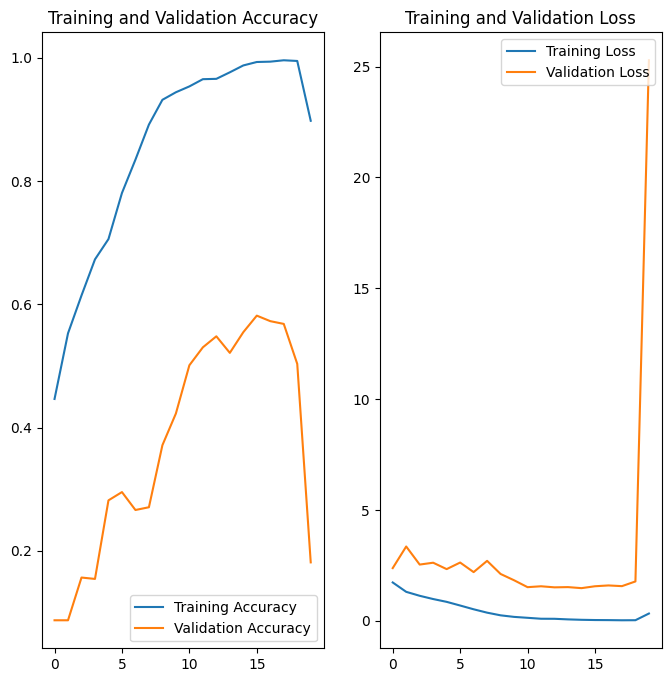

In [36]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, model_traces['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, model_traces['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model_traces['loss'], label='Training Loss')
plt.plot(epochs_range, model_traces['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Conclusion #####
1. Training accuracy seems to be 99% and Validation accuracy seems to be 56% for best model which is a clear form of overfitting,
2. The test accuracy is as low as 3% as the model has learnt the entire dataset and noise  and was performing poor in test data
3. The Validation accuracy dips beyond 15th epoch
4. The validation loss and training loss diverges beyond 10th epoch in 2nd graph
5. As the graph shows training loss comes down as the number of epoch increases

#### Installing Augmentor 

In [37]:
!pip install Augmentor


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [38]:
data_dir_test.__str__()

'C:\\Users\\meenaxi\\Downloads\\CNN_assignment\\Cancer\\Test'

In [39]:
base_dir=pathlib.Path("C:\\Users\\meenaxi\\Downloads\\CNN_assignment\\Cancer\\augmented")
base_dir.__str__()

'C:\\Users\\meenaxi\\Downloads\\CNN_assignment\\Cancer\\augmented'

#### Augmenting Data Operations

In [40]:
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(source_directory=data_dir_train.joinpath(i).__str__(),output_directory=base_dir.joinpath(i).__str__())
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(1200)

Initialised with 114 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\actinic keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x285D35FC340>: 100%|█| 1200/1200 [00:31<00:00, 38.23 Sample


Initialised with 376 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\basal cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x285D357B220>: 100%|█| 1200/1200 [00:27<00:00, 42.91 Sample


Initialised with 95 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\dermatofibroma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x28595CD8100>: 100%|█| 1200/1200 [00:28<00:00, 42.37 Sample


Initialised with 438 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\melanoma.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x28585248D60>: 100%|█| 1200/1200 [03:21<


Initialised with 357 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\nevus.

Processing <PIL.Image.Image image mode=RGB size=1007x711 at 0x28587A67E80>: 100%|█| 1200/1200 [01:50<00:00, 10.84 Sampl


Initialised with 462 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\pigmented benign keratosis.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2858EEBAEB0>: 100%|█| 1200/1200 [00:29<00:00, 40.94 Sample


Initialised with 77 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\seborrheic keratosis.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x28587566220>: 100%|█| 1200/1200 [01:13<00:00, 16.41 Sampl


Initialised with 181 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\squamous cell carcinoma.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x2858A308D90>: 100%|█| 1200/1200 [00:37<00:00, 31.94 Sample


Initialised with 139 image(s) found.
Output directory set to C:\Users\meenaxi\Downloads\CNN_assignment\Cancer\augmented\vascular lesion.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x285801D2850>: 100%|█| 1200/1200 [00:28<00:00, 41.78 Sample


In [41]:
data_dir_augmented = pathlib.Path("C:\\Users\\meenaxi\\Downloads\\CNN_assignment\\Cancer\\augmented")

In [42]:
image_aug = len(list(data_dir_augmented.glob('*/*.jpg')))
print(image_aug)

10800


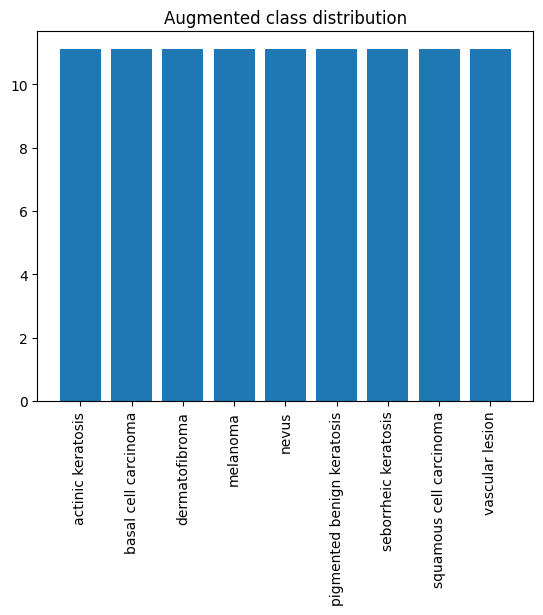

In [43]:
plot_class_distribution(data_dir_augmented,class_names,image_aug,title='Augmented class distribution')

In [44]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

#### Creating a dataset of Paths and Labels with Augmented Data

In [45]:
df = pd.DataFrame({})

In [46]:
classpaths=np.array([['paths','labels']])
for nclass in class_names:
    actual=np.array([(i.__str__(),nclass) for i in list(data_dir_augmented.joinpath(nclass).glob("*.jpg"))])
    augmented=np.array([(i.__str__(),nclass) for i in list(data_dir_train.joinpath(nclass).glob("*.jpg"))])
    classpath=np.append(actual,augmented,axis=0)
    classpaths=np.append(classpaths,classpath,axis=0)

In [47]:
augmented_df=pd.DataFrame(classpaths)

In [48]:
augmented_df=augmented_df[1:]

In [49]:
augmented_df.columns=['paths','labels']

In [50]:
augmented_df['labels'].value_counts()

labels
pigmented benign keratosis    1662
melanoma                      1638
basal cell carcinoma          1576
nevus                         1557
squamous cell carcinoma       1381
vascular lesion               1339
actinic keratosis             1314
dermatofibroma                1295
seborrheic keratosis          1277
Name: count, dtype: int64

#### Sampling the datapaths to treat Class Imbalance 

In [51]:
sampled_df=augmented_df.groupby('labels', group_keys=False).apply(lambda x: x.sample(min(len(x), 250)))

C:\Users\meenaxi\AppData\Local\Temp\ipykernel_14476\2933673698.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df=augmented_df.groupby('labels', group_keys=False).apply(lambda x: x.sample(min(len(x), 250)))


In [52]:
sampled_df['labels'].value_counts()

labels
actinic keratosis             250
basal cell carcinoma          250
dermatofibroma                250
melanoma                      250
nevus                         250
pigmented benign keratosis    250
seborrheic keratosis          250
squamous cell carcinoma       250
vascular lesion               250
Name: count, dtype: int64

In [53]:
from sklearn.preprocessing import LabelEncoder

In [54]:
le = LabelEncoder()
sampled_df['labels']=le.fit_transform(sampled_df['labels'])

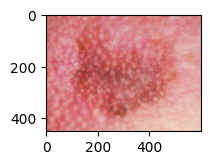

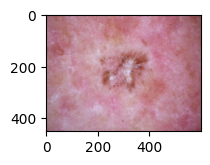

In [55]:
for i in sampled_df.iloc[1:3,0]:
     plt.figure(figsize=(2,2))
     plt.imshow(plt.imread(i))
     plt.show()

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
sampled_df.shape

(2250, 2)

In [58]:
df_train,df_val=train_test_split(sampled_df,test_size=0.2,random_state=100)

In [59]:
df_train.shape

(1800, 2)

In [60]:
df_val.shape

(450, 2)

#### Creating a Custom Data Generator

In [61]:
class DataGenerator(Sequence):
    
    'Generates data for Keras'
    def __init__(self,df,batch_size,img_ht,img_wd):
      self.df=df
      self.batch_size=batch_size
      self.img_ht=img_ht
      self.img_wd=img_wd
      self.on_epoch_end()

    def __len__(self):
        'Denotes the number of batches per epoch'
        return int(np.floor(len(self.df)/self.batch_size))

    def __getitem__(self, index):
        'Generate one batch of data'
        # Generate indexes of the batch
        indexes = self.indexes[index*self.batch_size:(index+1)*self.batch_size]
        images, labels = self.__data_generation(indexes)
        return images, to_categorical(labels,num_classes=9)

    def on_epoch_end(self):
        'Updates indexes after each epoch'
        self.indexes = np.arange(len(self.df))
        np.random.shuffle(self.indexes)    

    def  __data_generation(self, indexes):
        'Generates data containing batch_size samples' # X : (n_samples, *dim, n_channels)
        temp=[self.df.paths.iloc[i] for i in indexes]
        labels=[self.df.labels.iloc[i] for i in indexes]
        resize_and_rescale=tf.keras.Sequential([
          layers.Resizing(self.img_ht,self.img_wd),
          layers.Rescaling(1./255)
        ])
    
        for i in range(len(temp)):
          img = plt.imread(temp[i])
          temp[i]=resize_and_rescale(img)
        X = np.array(temp)
        y = np.array(labels)
        return X, y

In [62]:
batch_size=5
img_height = 180
img_width = 180

#### Verifying the DataGenerator for few cases

####
DataGenerator Takes care of resizing and rescaling the image and batches the train ,validation and test datasets and helps the data flow towards the model for fit , predict and evaluate

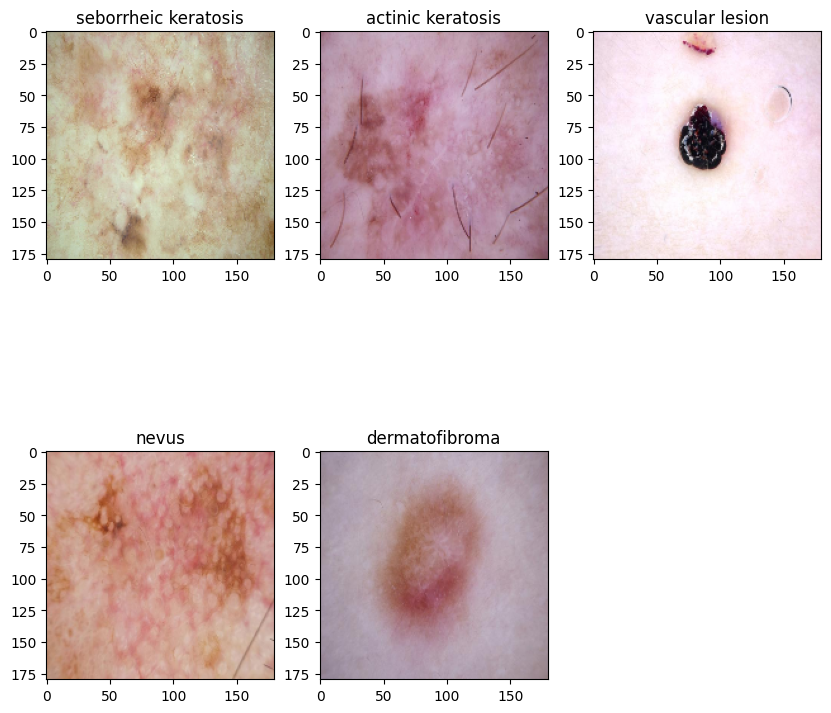

In [63]:
imdg=DataGenerator(sampled_df,batch_size,img_height,img_width)
img_item=imdg.__getitem__(0)
plt.figure(figsize=(10,10))
for i in range(0,batch_size):
    plt.subplot(2,3,i+1)
    plt.imshow(img_item[0][i])
    plt.title(class_names[np.argmax(img_item[1][i])])
plt.show()

In [68]:
batch_size=32

#### Model Generation 2-5

##### Creating Train and Validation Generator for Model Fit

In [70]:
train_generator=DataGenerator(df_train,batch_size,img_height,img_width)
validation_generator=DataGenerator(df_val,batch_size,img_height,img_width)

##### Creating Model 2 
 Fitting with Sampled Dataset of 250 classes each

In [71]:
model2=keras.Sequential()
model2.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.MaxPooling2D(2,2))

model2.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.MaxPooling2D(2,2))

model2.add(keras.layers.Flatten())
model2.add(keras.layers.Dense(64,activation='relu'))
model2.add(keras.layers.BatchNormalization())
model2.add(keras.layers.Dense(9,activation='softmax'))

In [72]:
model2.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [73]:
history=model2.fit(train_generator,epochs=20,validation_data=validation_generator,verbose=1)

Epoch 1/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 199s 3s/step - accuracy: 0.2782 - loss: 2.1896 - val_accuracy: 0.1429 - val_loss: 2.6204
Epoch 2/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 163s 3s/step - accuracy: 0.5126 - loss: 1.3610 - val_accuracy: 0.1205 - val_loss: 2.8760
Epoch 3/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 166s 3s/step - accuracy: 0.6258 - loss: 1.0685 - val_accuracy: 0.1049 - val_loss: 2.7335
Epoch 4/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 203s 3s/step - accuracy: 0.7325 - loss: 0.8298 - val_accuracy: 0.1942 - val_loss: 2.7559
Epoch 5/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 170s 3s/step - accuracy: 0.8135 - loss: 0.6567 - val_accuracy: 0.1384 - val_loss: 2.8716
Epoch 6/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 176s 3s/step - accuracy: 0.8572 - loss: 0.4772 - val_accuracy: 0.1138 - val_loss: 3.2933
Epoch 7/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 180s 3s/step - accuracy: 0.9169 - loss: 0.3433 - val_accuracy: 0.2991 - val_loss: 2.4370
Epoch 8/20
56/56 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.9467 - loss: 0.2409 - val_accuracy: 0.3281 - v

In [74]:
model2_traces=pd.DataFrame(history.history)

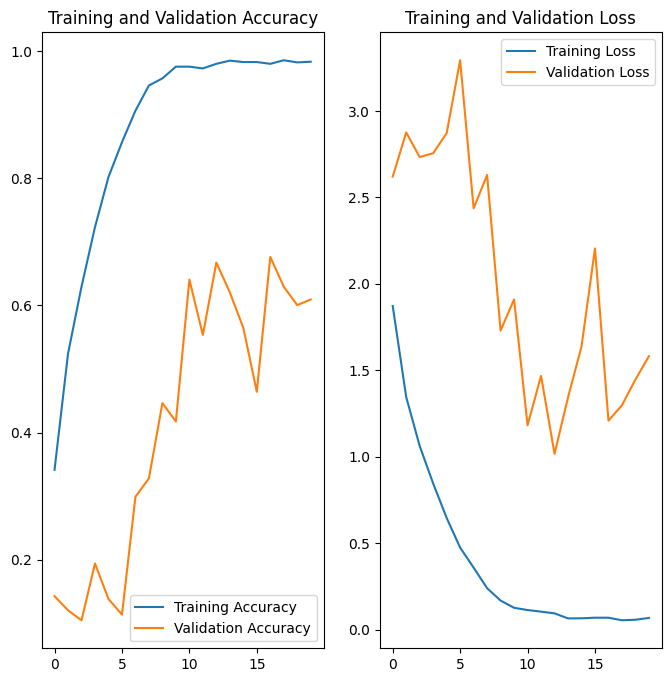

In [75]:
epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, model2_traces['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, model2_traces['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model2_traces['loss'], label='Training Loss')
plt.plot(epochs_range, model2_traces['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Model 2 Evaluation and Prediction

In [76]:
predictions=model2.predict(test_ds)

4/4 ━━━━━━━━━━━━━━━━━━━━ 46s 2s/step


In [77]:
predictions

array([[0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 7.476931e-32,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       ...,
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 1.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00],
       [0.000000e+00, 0.000000e+00, 0.000000e+00, ..., 0.000000e+00,
        0.000000e+00, 0.000000e+00]], dtype=float32)

In [78]:
predicted_class=[class_names[np.argmax(i)] for i in predictions]

##### Creating a Test Dataframe and Test Data Generator

In [79]:
tests=np.array([['paths','labels']])
for nclass in class_names:
    test=np.array([(i.__str__(),nclass) for i in list(data_dir_test.joinpath(nclass).glob("*.jpg"))])
    tests=np.append(tests,test,axis=0)

In [80]:
test_df=pd.DataFrame(tests)
test_df=test_df[1:]

In [81]:
test_df.columns=['paths','labels']

In [82]:
test_df.shape

(118, 2)

In [83]:
test_df['labels']=le.transform(test_df['labels'])

In [84]:
test_df.head()

,paths,labels
1,C:\Users\meenaxi\Downloads\CNN_assignment\Canc...,0
2,C:\Users\meenaxi\Downloads\CNN_assignment\Canc...,0
3,C:\Users\meenaxi\Downloads\CNN_assignment\Canc...,0
4,C:\Users\meenaxi\Downloads\CNN_assignment\Canc...,0
5,C:\Users\meenaxi\Downloads\CNN_assignment\Canc...,0


In [85]:
test_generator=DataGenerator(test_df,batch_size,img_height,img_width)

##### Evaluating on model 2

In [86]:
model2.evaluate(test_generator)

C:\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.2891 - loss: 3.5534


[3.434150457382202, 0.28125]

In [87]:
model2.evaluate(validation_generator)

14/14 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.5772 - loss: 1.8195


[1.6023967266082764, 0.6071428656578064]

##### Conclusion
1. As seen in the above graph , the validation accuracy has moved beyond .6 .
2. In testset  accuracy has moved to 28%
3. The overfitting has been primarily solved to some extent by Augmentation and Sampling

##### Model 3
 1. Increasing the Sample Size to 350 per class , 
 2. Adding Regularization Parameters such as drop outs
 3. Adding Early Stopping Criteria Callback

In [88]:
sampled_df=augmented_df.groupby('labels', group_keys=False).apply(lambda x: x.sample(min(len(x), 350)))
sampled_df['labels']=le.transform(sampled_df['labels'])
df_train,df_val=train_test_split(sampled_df,test_size=0.2)
train_generator=DataGenerator(df_train,batch_size,img_height,img_width)
validation_generator=DataGenerator(df_val,batch_size,img_height,img_width)

C:\Users\meenaxi\AppData\Local\Temp\ipykernel_14476\927749906.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df=augmented_df.groupby('labels', group_keys=False).apply(lambda x: x.sample(min(len(x), 350)))


In [89]:
sampled_df['labels'].value_counts()

labels
0    350
1    350
2    350
3    350
4    350
5    350
6    350
7    350
8    350
Name: count, dtype: int64

In [92]:
model3=keras.Sequential()
model3.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(img_height, img_width, 3)))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Dropout(0.2))

model3.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.MaxPooling2D(2,2))
model3.add(keras.layers.Dropout(0.2))

model3.add(keras.layers.Flatten())
model3.add(keras.layers.Dense(64,activation='relu'))
model3.add(keras.layers.BatchNormalization())
model3.add(keras.layers.Dropout(0.2))

model3.add(keras.layers.Dense(9,activation='softmax'))

C:\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [93]:
def scheduler(epoch, lr):
    if epoch < 10:
        return lr
    else:
        return lr * ops.exp(-0.1)
lr_callback = keras.callbacks.LearningRateScheduler(scheduler)

In [94]:
model3.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [95]:
model3.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 64)                  │       8,294,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,315,081 (31.72 MB)

 Trainable params: 8,314,761 (31.72 MB)

 Non-trainable params: 320 (1.25 KB)

##### Early Stopping Callback

In [96]:
es_callback = keras.callbacks.EarlyStopping(monitor='loss',
                                              patience=3)

In [99]:
history=model3.fit(train_generator,epochs=20,validation_data=validation_generator,verbose=1,callbacks=[es_callback])

Epoch 1/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 237s 3s/step - accuracy: 0.7262 - loss: 0.8156 - val_accuracy: 0.1102 - val_loss: 164.3574
Epoch 2/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 247s 3s/step - accuracy: 0.8293 - loss: 0.5705 - val_accuracy: 0.1431 - val_loss: 192.0883
Epoch 3/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 255s 3s/step - accuracy: 0.8730 - loss: 0.4341 - val_accuracy: 0.2632 - val_loss: 34.8430
Epoch 4/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 245s 3s/step - accuracy: 0.9093 - loss: 0.3270 - val_accuracy: 0.2533 - val_loss: 53.5702
Epoch 5/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 250s 3s/step - accuracy: 0.9476 - loss: 0.2309 - val_accuracy: 0.4951 - val_loss: 10.5468
Epoch 6/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 264s 3s/step - accuracy: 0.9548 - loss: 0.1816 - val_accuracy: 0.7007 - val_loss: 1.0343
Epoch 7/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 249s 3s/step - accuracy: 0.9609 - loss: 0.1624 - val_accuracy: 0.4786 - val_loss: 2.3539
Epoch 8/20
78/78 ━━━━━━━━━━━━━━━━━━━━ 254s 3s/step - accuracy: 0.9659 - loss: 0.1249 - val_accuracy: 0.2

In [100]:
model3.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.3815 - loss: 3.9809


[4.937240123748779, 0.3645833432674408]

In [103]:
model3.evaluate(validation_generator)

19/19 ━━━━━━━━━━━━━━━━━━━━ 16s 834ms/step - accuracy: 0.5841 - loss: 1.4879


[1.5790507793426514, 0.5773026347160339]

In [104]:
model3_traces=pd.DataFrame(history.history)

In [105]:
model3.optimizer.learning_rate

<Variable path=adam/learning_rate, shape=(), dtype=float32, value=0.0010000000474974513>

In [106]:
model3_traces.shape

(20, 4)

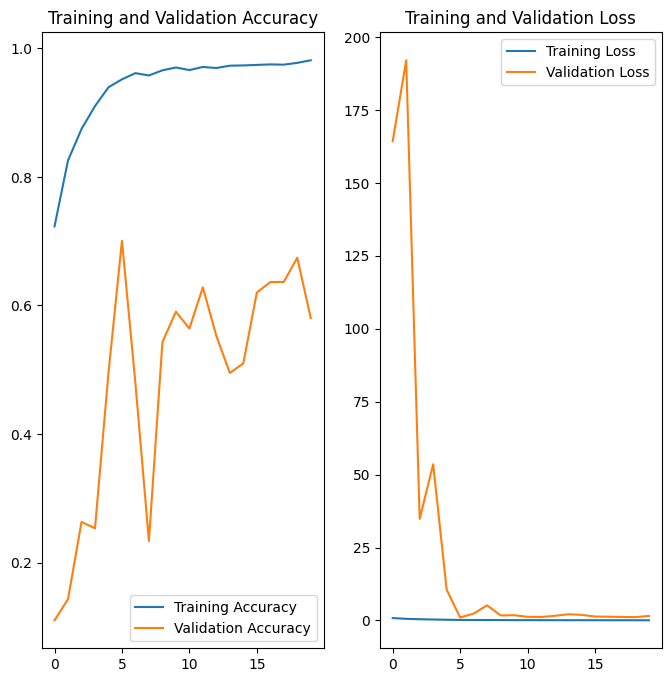

In [107]:
epochs_range = range(20)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, model3_traces['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, model3_traces['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model3_traces['loss'], label='Training Loss')
plt.plot(epochs_range, model3_traces['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Conclusion
1. The direction of Training and Validation accuracy seems to be upwards , however the accuracy slipped to 98% as part of regularization applied
2. The validation accuracy took a slight dip with accuracy around 58%
3. The loss graphs of train and validation are pretty close
4. The Test accuracy has slightly improved to 36 %

#####  Model 4 
1. Increasing Number of epochs to 30
2. Sample size to 500
3. Tuned dropout ratio

In [108]:
sampled_df=augmented_df.groupby('labels', group_keys=False).apply(lambda x: x.sample(min(len(x), 500)))
sampled_df['labels']=le.transform(sampled_df['labels'])
df_train,df_val=train_test_split(sampled_df,test_size=0.2)
train_generator=DataGenerator(df_train,batch_size,img_height,img_width)
validation_generator=DataGenerator(df_val,batch_size,img_height,img_width)

C:\Users\meenaxi\AppData\Local\Temp\ipykernel_14476\3742774625.py:1: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sampled_df=augmented_df.groupby('labels', group_keys=False).apply(lambda x: x.sample(min(len(x), 500)))


In [109]:
model4=keras.Sequential()
model4.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(img_height, img_width, 3)))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(2,2))
model4.add(keras.layers.Dropout(0.3))

model4.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.MaxPooling2D(2,2))
model4.add(keras.layers.Dropout(0.3))

model4.add(keras.layers.Flatten())
model4.add(keras.layers.Dense(64,activation='relu'))
model4.add(keras.layers.BatchNormalization())
model4.add(keras.layers.Dropout(0.3))

model4.add(keras.layers.Dense(9,activation='softmax'))

C:\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [110]:
model4.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [111]:
model4.summary()

Model: "sequential_33"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)                    │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_12               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_13               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 129600)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 64)                  │       8,294,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_14               │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 8,315,081 (31.72 MB)

 Trainable params: 8,314,761 (31.72 MB)

 Non-trainable params: 320 (1.25 KB)

In [115]:
sampled_df.labels.value_counts()

labels
0    500
1    500
2    500
3    500
4    500
5    500
6    500
7    500
8    500
Name: count, dtype: int64

In [116]:
history=model4.fit(train_generator,epochs=30,validation_data=validation_generator,verbose=1,callbacks=[es_callback])

C:\Python39\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 465s 4s/step - accuracy: 0.2793 - loss: 2.2134 - val_accuracy: 0.1507 - val_loss: 2.6451
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 339s 3s/step - accuracy: 0.4628 - loss: 1.4355 - val_accuracy: 0.1194 - val_loss: 3.5650
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 351s 3s/step - accuracy: 0.5421 - loss: 1.2382 - val_accuracy: 0.1384 - val_loss: 2.8919
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 336s 3s/step - accuracy: 0.6250 - loss: 1.0741 - val_accuracy: 0.2533 - val_loss: 1.9651
Epoch 5/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 318s 3s/step - accuracy: 0.6858 - loss: 0.8944 - val_accuracy: 0.3661 - val_loss: 1.8740
Epoch 6/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 330s 3s/step - accuracy: 0.7151 - loss: 0.8144 - val_accuracy: 0.5078 - val_loss: 1.3381
Epoch 7/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 361s 3s/step - accuracy: 0.7648 - loss: 0.6977 - val_accuracy: 0.3248 - val_loss: 2.3349
Epoch 8/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 314s 3s/step - accuracy: 0.7956 - loss: 0.6038 - val_accu

In [117]:
model4.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 11s 3s/step - accuracy: 0.2487 - loss: 3.2839


[3.209272623062134, 0.2395833283662796]

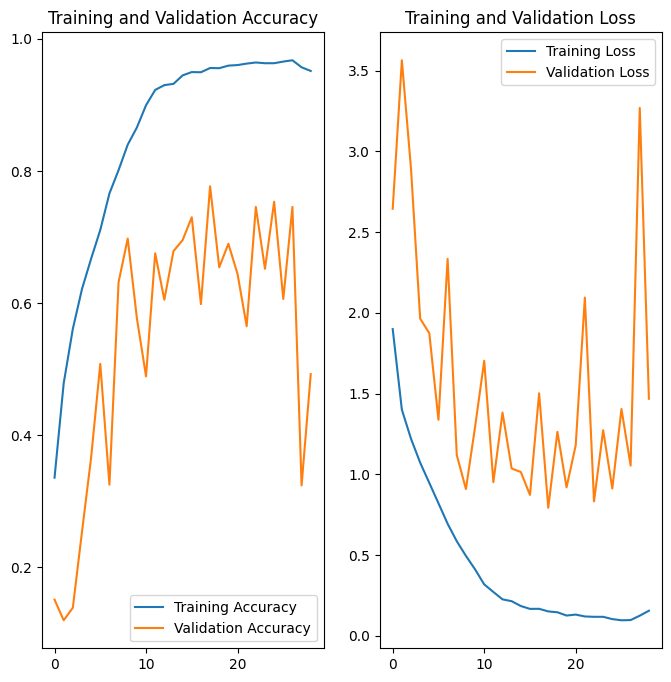

In [119]:
model4_traces=pd.DataFrame(history.history)
epochs_range = range(29)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, model4_traces['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, model4_traces['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model4_traces['loss'], label='Training Loss')
plt.plot(epochs_range, model4_traces['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Conclusion
1. The Validation accuracy has been in 70s around 15th epoch
2. The drop outs seems to have regularized the overfitting issue
3. The increase in sample size seems to have generalized the model very well

##### Creating Model 5 
1. Adding an 128 nueron conv layer to existing architecture
2. Tuning Drop outs

In [120]:
model5=keras.Sequential()
model5.add(keras.layers.Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(img_height, img_width, 3)))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(2,2))
model5.add(keras.layers.Dropout(0.3))

model5.add(keras.layers.Conv2D(64,(3,3),activation='relu',padding='same'))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(2,2))
model5.add(keras.layers.Dropout(0.3))

model5.add(keras.layers.Conv2D(128,(3,3),activation='relu',padding='same'))
model5.add(keras.layers.BatchNormalization())
model5.add(keras.layers.MaxPooling2D(2,2))
model5.add(keras.layers.Dropout(0.3))

model5.add(keras.layers.Flatten())
model5.add(keras.layers.Dense(64,activation='relu'))
model5.add(keras.layers.Dropout(0.3))
model5.add(keras.layers.Dense(9,activation='softmax'))

C:\Python39\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [121]:
model5.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [122]:
model5.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)                   │ (None, 180, 180, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_15               │ (None, 180, 180, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 90, 90, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 90, 90, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_16               │ (None, 90, 90, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_11 (MaxPooling2D)      │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 45, 45, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 45, 45, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_17               │ (None, 45, 45, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_12 (MaxPooling2D)      │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 22, 22, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_5 (Flatten)                  │ (None, 61952)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 64)                  │       3,964,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 9)                   │             585 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,059,721 (15.49 MB)

 Trainable params: 4,059,273 (15.48 MB)

 Non-trainable params: 448 (1.75 KB)

In [123]:
history=model5.fit(train_generator,epochs=20,validation_data=validation_generator,verbose=1,callbacks=[es_callback])

Epoch 1/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 470s 4s/step - accuracy: 0.1539 - loss: 5.4030 - val_accuracy: 0.1071 - val_loss: 22.3950
Epoch 2/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 456s 4s/step - accuracy: 0.1485 - loss: 2.1961 - val_accuracy: 0.1016 - val_loss: 19.3628
Epoch 3/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.1291 - loss: 2.1613 - val_accuracy: 0.0971 - val_loss: 11.7434
Epoch 4/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 430s 4s/step - accuracy: 0.1164 - loss: 2.1978 - val_accuracy: 0.1228 - val_loss: 10.8407
Epoch 5/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 427s 4s/step - accuracy: 0.1122 - loss: 2.1973 - val_accuracy: 0.0960 - val_loss: 7.3337
Epoch 6/20
112/112 ━━━━━━━━━━━━━━━━━━━━ 433s 4s/step - accuracy: 0.1147 - loss: 2.1975 - val_accuracy: 0.0915 - val_loss: 4.5015


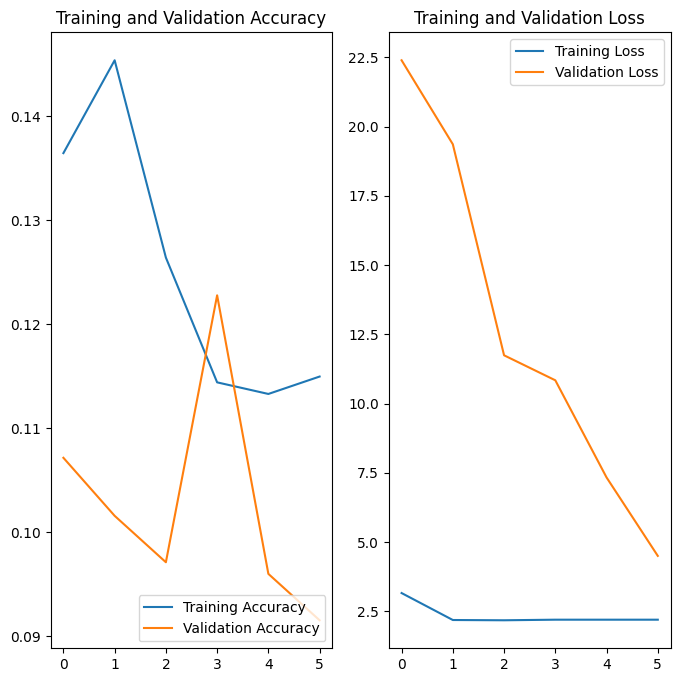

In [126]:
model5_traces=pd.DataFrame(history.history)
epochs_range = range(6)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, model5_traces['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, model5_traces['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, model5_traces['loss'], label='Training Loss')
plt.plot(epochs_range, model5_traces['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

##### Conclusion
1. The addition of 128 nuerons took a hit on accuracy. There was no improvement after 6th epoch
2. The model was stopped earlier to due the early convergence in the loss
3. The accuracy took a great hit and could not improve beyond 11% 

#### Final Run 
The Model 4 seems to have generalized the data very well with 
1. Sample Size=500
2. Dropouts=0.3
3. Validation accuracy = 0.75
4. Train accuracy = 0.96

##### Saving the Model with Best Epoch by adding ModelCheckPoint callback and refitting

In [132]:
filepath="C:\\Users\\meenaxi\\Downloads\\CNN_assignment\\models"

In [133]:
checkpoint = tf.keras.callbacks.ModelCheckpoint("model.keras",monitor="val_accuracy",save_best_only=True,mode="auto",verbose=1)

In [134]:
final_run=model4.fit(train_generator,epochs=30,validation_data=validation_generator,verbose=1,callbacks=[es_callback,checkpoint])

Epoch 1/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9479 - loss: 0.1539
Epoch 1: val_accuracy improved from -inf to 0.70089, saving model to model.keras
112/112 ━━━━━━━━━━━━━━━━━━━━ 409s 4s/step - accuracy: 0.9479 - loss: 0.1539 - val_accuracy: 0.7009 - val_loss: 1.0838
Epoch 2/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9591 - loss: 0.1118
Epoch 2: val_accuracy did not improve from 0.70089
112/112 ━━━━━━━━━━━━━━━━━━━━ 381s 3s/step - accuracy: 0.9591 - loss: 0.1118 - val_accuracy: 0.6484 - val_loss: 1.4321
Epoch 3/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9730 - loss: 0.0829
Epoch 3: val_accuracy did not improve from 0.70089
112/112 ━━━━━━━━━━━━━━━━━━━━ 346s 3s/step - accuracy: 0.9729 - loss: 0.0830 - val_accuracy: 0.6808 - val_loss: 1.1937
Epoch 4/30
112/112 ━━━━━━━━━━━━━━━━━━━━ 0s 3s/step - accuracy: 0.9659 - loss: 0.1016
Epoch 4: val_accuracy did not improve from 0.70089
112/112 ━━━━━━━━━━━━━━━━━━━━ 348s 3s/step - accuracy: 0.9658 - loss: 0.1

In [136]:
model4.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 3s/step - accuracy: 0.4128 - loss: 3.3358


[3.5544655323028564, 0.3958333432674408]

##### Retrieving from the saved Model

In [142]:
saved_model = tf.keras.models.load_model('model.keras')

In [143]:
saved_model.evaluate(validation_generator)

28/28 ━━━━━━━━━━━━━━━━━━━━ 34s 1s/step - accuracy: 0.7635 - loss: 0.9174


[0.9321872591972351, 0.7566964030265808]

In [144]:
saved_model.evaluate(test_generator)

3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 3s/step - accuracy: 0.3698 - loss: 3.7014


[3.660249948501587, 0.3645833432674408]

Text(0.5, 1.0, 'pigmented benign keratosis')

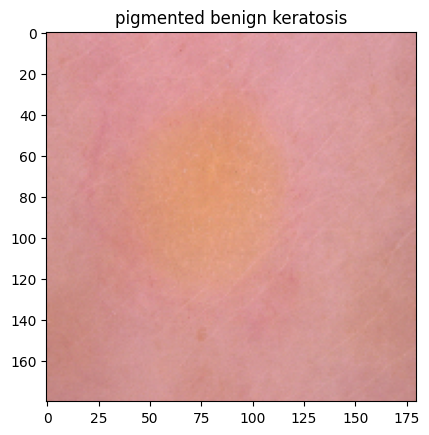

In [159]:
im=test_generator.__getitem__(0)
plt.imshow(im[0][0])
plt.title(class_names[np.argmax(im[1][0])])

In [160]:
class_names[np.argmax(saved_model.predict(im)[0])]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 667ms/step


'pigmented benign keratosis'

#### Summary
1. Created vanilla CNN Model 1 wiwith given training dataset
   The model1 has severe overfitting issue when fitted with unseen data. The accuracy in test data is as low as 3%
2. We observed the training label distribution which are not same
3. We did Augmentation for the training images, We combined the paths with the original images and created Augmented DataFrame.
4. We created DataGenerator with augmented dataframe , scaled and resized using keras
5. We created a Stratified Sampling Strategy to sample data from the augmented dataframe to have Equal distribution
6. We created Model2 with the sampled dataset of 250 samples
7. We Identified the accuracy of validation set reached .6 and test set improved to 28%
8. We Increased the sample size again to 350 and added retrained the model with model 3 , we have seen a positive impact on test accuracy. The accuracy increased to 36%. However the validation accuracy remained .58
9. We Increased the sample size again to 500 . We have added regularization parameter such as dropout. The model seems to have generalized well with validation accuracy of 75%
10. We tried altering the architecture by adding one more convolution layer and retrained model 5. The accuracy took a big hit
11. We retrained model4 with modelcheckpoints to find out the best model , we came out with a model of
    training accuracy=97%and validation accuracy=76%
12. We loaded the saved model and predicted on test dataset and we got an accuracy of 41%